# EE460J Lab 1

James Lu, Soroush Famili

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.

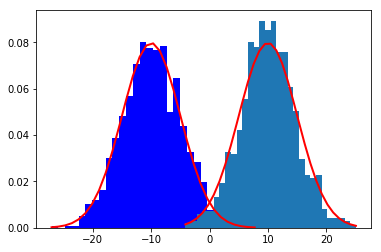

In [121]:
#generate random samples
n = 1000

mean_1 = -10
std_1 = 5
samples_1 = np.random.normal(mean_1, std_1, n)

mean_2 = 10
std_2 = 5
samples_2 = np.random.normal(mean_2, std_2, n)

#plot values
count_1, bins_1, ignored_1 = plt.hist(samples_1, bins=30, density=True, color="blue")
plt.plot(bins_1, 1/(std_1 * np.sqrt(2 * np.pi)) *
            np.exp( - (bins_1 - mean_1)**2 / (2 * std_1**2) ),
            linewidth=2, color='r')
count_2, bins_2, ignored_2 = plt.hist(samples_2, bins=30, density=True)
plt.plot(bins_2, 1/(std_2 * np.sqrt(2 * np.pi)) *
            np.exp( - (bins_2 - mean_2)**2 / (2 * std_2**2) ),
            linewidth=2, color='r')

plt.show()

**(a) Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point,
and plot the histogram of the resulting 1000 points. What do you observe?**

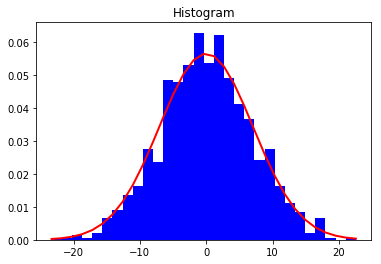

In [122]:
#compute sum
samples = samples_1 + samples_2
mean = 0
std = np.sqrt(50)

#plot values
count, bins, ignored = plt.hist(samples, bins=30, density=True, color="blue")
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
            np.exp( - (bins - mean)**2 / (2 * std**2) ),
            linewidth=2, color='r')

plt.title("Histogram")
plt.show()

I realized that the sum of these samples, which were taken from normal distributions, resulted in what looks like samples from a new normal distribution.

**(b) Estimate the mean and the variance of the sum.**

Because both these samples were taken from normal distributions, the new mean μ is the sum of the previous means (μ = μ<sub>1</sub> + μ<sub>2</sub> ≈ 0), and the new variance σ<sup>2</sup> is the sum of the previous variances (σ<sup>2</sup> = σ<sub>1</sub><sup>2</sup> + σ<sub>2</sub><sup>2</sup> ≈ 50), meaning that the new standard deviation σ ≈ 7.07

In [123]:
print("Validating findings:")
print("μ = ", samples.mean())
print("σ^2 = ", samples.var())
print("σ = ", np.sqrt(samples.var()))

Validating findings:
μ =  0.12129608861040049
σ^2 =  47.27903219565388
σ =  6.875974999638515


### 2. Central Limit Theorem


In [124]:
samples = 1000
n = 250  #num. of bernoulli rvs
bernoulli = [-1,1]  #values for bernoulli rv
result = []
for i in range(samples):
    sample = 0 #generate sample of Z_n
    for j in range(n):
        sample += np.random.choice(bernoulli)  #sum of bernoulli rvs 
    sample /= np.sqrt(n) #normalize
    result.append(sample)

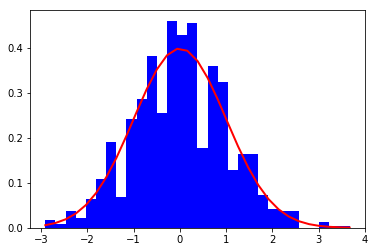

In [125]:
count, bins, ignored = plt.hist(result, bins=30, density=True, color="blue")
plt.plot(bins, 1/(1 * np.sqrt(2 * np.pi)) *
            np.exp( - (bins - 0)**2 / (2 * 1**2) ),
            linewidth=2, color='r')
plt.show()

### 3. Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [155]:
#generate random samples
n = 25000
mean = 0
std = 5
samples = np.random.normal(mean, std, n)

In [156]:
mean_measured = 0  #compute mean for samples
for s in np.nditer(samples):
    mean_measured += s / n
    
var_measured = 0  #compute variance: squared differences from mean
for s in np.nditer(samples):
    var_measured += (s - mean_measured)**2 / n
    
std_measured = np.sqrt(var_measured)  #compute standard deviation

In [157]:
print(mean_measured)
print(std_measured)

-0.020452630680877652
5.0002115708215635


### 4. Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution

In [172]:
n = 10000
mean = [-5,5]
covariance = [[20, .8],[.8, 30]]
samples = np.random.multivariate_normal(mean, covariance, n).T

In [173]:
mean_measured = [0, 0]
for s in np.nditer(samples[0]):
    mean_measured[0] += s / n  # compute mean for X
    
for s in np.nditer(samples[1]):
    mean_measured[1] += s / n  # compute mean for y

In [185]:
covariance_measured = [[0,0],[0,0]]
for s in np.nditer(samples[0]):
    covariance_measured[0][0] += (s - mean_measured[0])**2 / n  # compute variance for X
    
for s in np.nditer(samples[1]):
    covariance_measured[1][1] += (s - mean_measured[1])**2 / n  # compute variance for y
    
for i in range(n):
    covariance_measured[0][1] += (samples[0][i] - mean_measured[0])*(samples[1][i] - mean_measured[0]) / n
    covariance_measured[1][0] = covariance_measured[0][1]  # compute covariance

In [187]:
print(np.array(covariance_measured))
print(np.cov(samples))

[[19.8612933   0.77141024]
 [ 0.77141024 30.013863  ]]
[[19.86327963  0.77148739]
 [ 0.77148739 30.01686468]]


# 5. Each row is a patient and the last column is the condition that the patient has. Do data exploration using Pandas and other visualization tools to understand what you can about the dataset.

In [133]:
patients = pd.read_csv("PatientData.csv")

(a) How many patients and how many features are there?


In [134]:
patients.shape # 451 patients, 280 features

(451, 280)

(b) What is the meaning of the first 4 features? See if you can understand what they mean.

In [135]:
display(patients)

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.3,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
5,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
6,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
7,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
8,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10
9,62,0,170,72,102,135,401,156,83,72,...,-0.5,9.0,-2.0,0.0,0.0,0.8,0.9,12.3,19.3,3


First feature could be age of patient. Second could be male or female. Third could be height in centimeters. Fourth could be mass in kilograms.

(c) Are there missing values? Replace them with the average of the corresponding feature
column.